In [1]:
!wget https://blume-hackathon.s3.ap-south-1.amazonaws.com/milkbasket_hackathon_data.zip

--2019-08-04 02:08:40--  https://blume-hackathon.s3.ap-south-1.amazonaws.com/milkbasket_hackathon_data.zip
Resolving blume-hackathon.s3.ap-south-1.amazonaws.com (blume-hackathon.s3.ap-south-1.amazonaws.com)... 52.219.66.46
Connecting to blume-hackathon.s3.ap-south-1.amazonaws.com (blume-hackathon.s3.ap-south-1.amazonaws.com)|52.219.66.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253266784 (242M) [binary/octet-stream]
Saving to: ‘milkbasket_hackathon_data.zip’

milkbasket_hackatho 100%[===================>] 241.53M  13.2MB/s    in 21s     

2019-08-04 02:09:02 (11.8 MB/s) - ‘milkbasket_hackathon_data.zip’ saved [253266784/253266784]



In [2]:
!unzip milkbasket_hackathon_data.zip

Archive:  milkbasket_hackathon_data.zip
  inflating: temp_bq_data/hackathon_data.csv  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

In [4]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
df = pd.read_csv("temp_bq_data/hackathon_data.csv")

In [37]:
df.tail()

,customer_id,manufacturer_id,society_id,city_id,route_id,store_id,order_id,order_date,category_id,subcategory_id,product_id,product_quantity,selling_price_per_unit,total_cost,subscription,product_addedtobasket_on
9678974,11641504,1122016,1191344,1120224,1157296,1120560,1667478960,2019-07-31,1122576,1125152,1140160,1,22.25,22.25,0,2019-07-30 23:03:23
9678975,26676048,1150128,1194816,1120224,1155952,1120560,1666820176,2019-07-31,1123472,1130640,2118368,2,6.00,12.00,0,2019-07-30 20:34:26
9678976,23372832,1150128,1192464,1120224,1157184,1120560,1666636608,2019-07-31,1123472,1131312,1691872,1,20.00,20.00,0,2019-07-30 19:43:24
9678977,12061952,1150128,1194816,1120224,1155952,1120560,1667015280,2019-07-31,1123472,1131312,1691872,1,20.00,20.00,0,2019-07-30 21:22:32
9678978,35808304,1136352,1187200,1120224,1158864,1120560,1666372176,2019-07-31,1123024,1128064,2208640,1,36.04,36.04,0,2019-07-30 15:18:08


In [0]:
df = df[df['subcategory_id']==1125152]

In [53]:
df.head()

,customer_id,manufacturer_id,society_id,city_id,route_id,store_id,order_id,order_date,category_id,subcategory_id,product_id,product_quantity,selling_price_per_unit,total_cost,subscription,product_addedtobasket_on
1,1134224,1134336,1120224,1120112,1120336,1120112,337533168,2018-05-01,1122576,1125152,1939280,1,8.79,8.79,1,2018-04-19 01:30:02
49,1819328,1134336,1124368,1120112,1124256,1120112,338154656,2018-05-01,1122576,1125152,1939280,2,8.79,17.58,0,2018-04-30 20:48:13
99,1354752,1122016,1121792,1120112,1120336,1120112,337684928,2018-05-01,1122576,1125152,2166080,1,8.10,8.10,1,2018-04-26 22:05:35
104,4939536,1122016,1142624,1120112,1123584,1120112,338096192,2018-05-01,1122576,1125152,2166080,1,8.10,8.10,0,2018-04-30 19:18:20
153,3899392,1134336,1127392,1120112,1121792,1120112,338001104,2018-05-01,1122576,1125152,1939280,4,8.79,35.16,0,2018-04-30 22:22:20


In [0]:
data = df.groupby(['order_date'])['product_quantity'].sum().reset_index()

In [55]:
data.head()

,order_date,product_quantity
0,2018-05-01,188
1,2018-05-02,192
2,2018-05-03,202
3,2018-05-04,187
4,2018-05-05,158


In [56]:
data.count()

order_date          456
product_quantity    456
dtype: int64

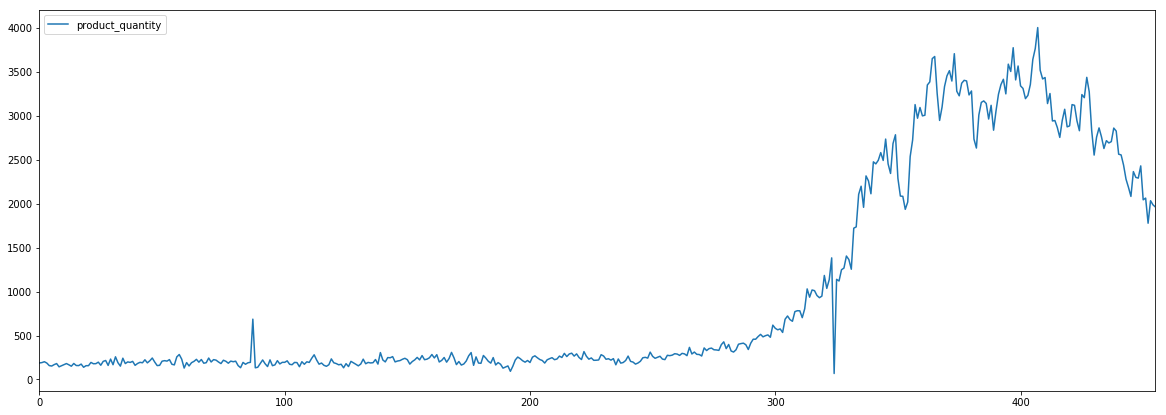

In [57]:
from matplotlib import pyplot
data.plot()
pyplot.show()

In [0]:
x = data.iloc[:,1].values

In [59]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(x, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  455
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2898.221
Method:                       css-mle   S.D. of innovations            141.256
Date:                Sun, 04 Aug 2019   AIC                           5810.441
Time:                        02:30:35   BIC                           5839.283
Sample:                             1   HQIC                          5821.804
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9456      3.894      1.013      0.311      -3.686      11.577
ar.L1.D.y     -0.3117      0.047     -6.668      0.000      -0.403      -0.220
ar.L2.D.y     -0.0969      0.048     -2.000      0.0

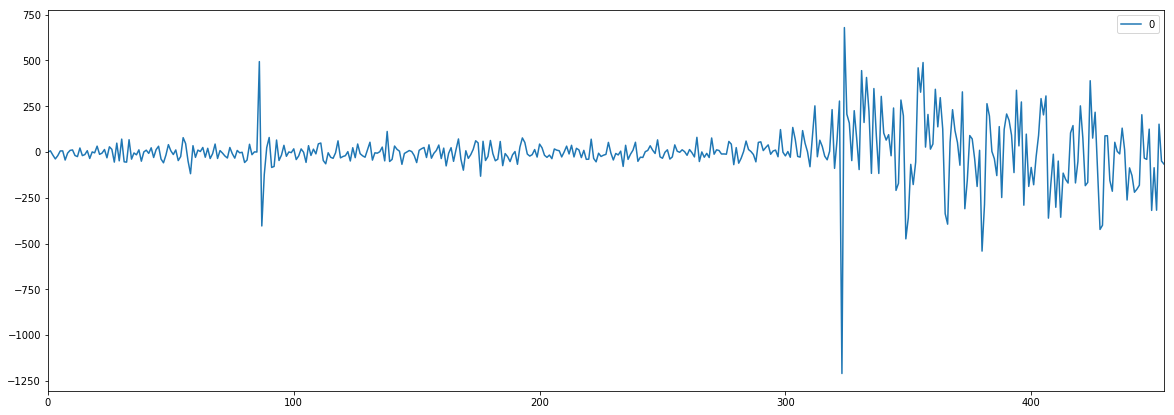

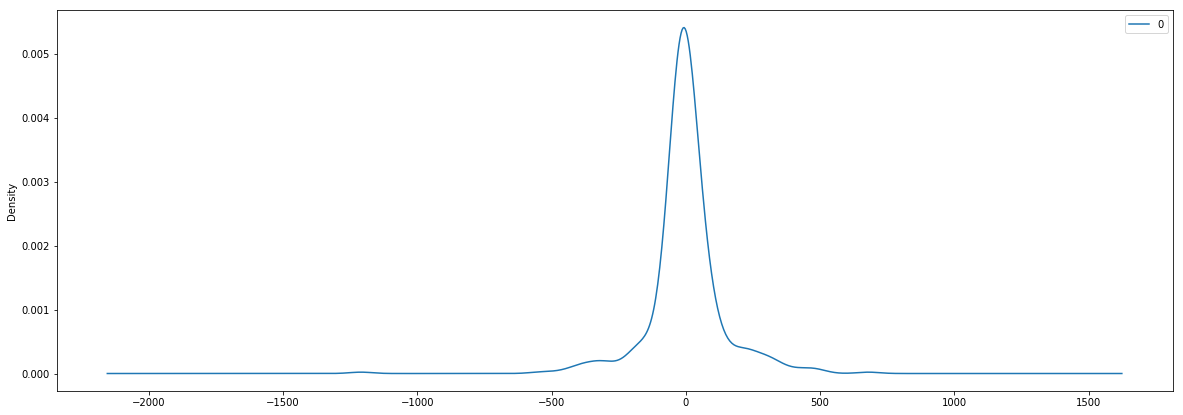

                 0
count   455.000000
mean     -0.022537
std     141.411895
min   -1209.860601
25%     -37.479482
50%      -4.679826
75%      37.035727
max     679.145348


In [60]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [61]:
x.shape

(456,)

In [0]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [0]:
X = reject_outliers(x)

In [64]:
x.shape

(456,)

In [0]:
import math
from sklearn.metrics import mean_squared_error

In [65]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=373.957814, expected=413.000000
predicted=378.195706, expected=395.000000
predicted=385.306452, expected=341.000000
predicted=377.408808, expected=413.000000
predicted=398.612200, expected=458.000000
predicted=413.334358, expected=458.000000
predicted=422.492627, expected=488.000000
predicted=442.902469, expected=513.000000
predicted=459.991889, expected=485.000000
predicted=475.576224, expected=498.000000
predicted=490.716663, expected=507.000000
predicted=497.153290, expected=480.000000
predicted=494.617655, expected=618.000000
predicted=537.226497, expected=582.000000
predicted=543.313296, expected=565.000000
predicted=552.767867, expected=575.000000
predicted=567.281327, expected=535.000000
predicted=554.112324, expected=685.000000
predicted=610.510624, expected=722.000000
predicted=637.459369, expected=681.000000
predicted=647.226723, expected=662.000000
predicted=658.848144, expected=772.000000
predicted=699.181703, expected=782.000000
predicted=735.258451, expected=781

In [68]:
sd = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % sd)

Test RMSE: 232.404


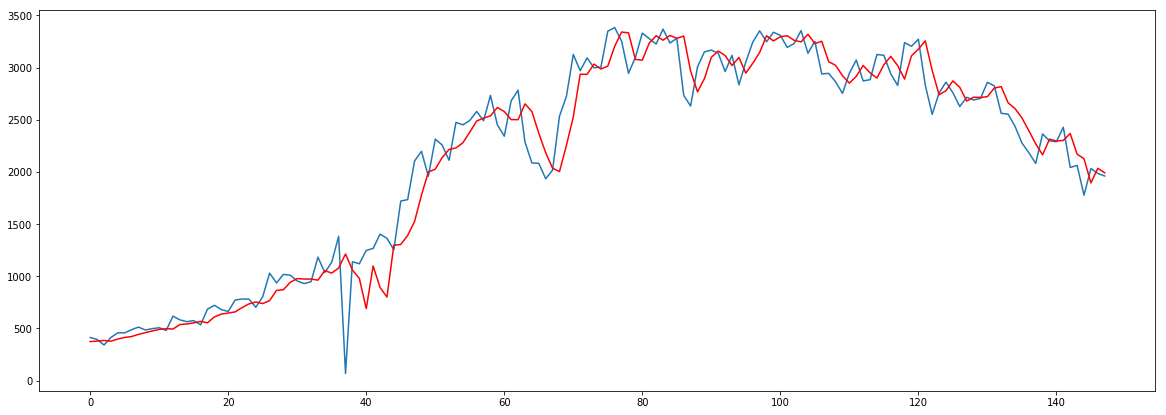

In [66]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()